In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./1_boston_housing.csv")

In [3]:
df.shape

(506, 14)

In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.MEDV.shape

(506,)

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404, 1)
y_test shape: (102, 1)


# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

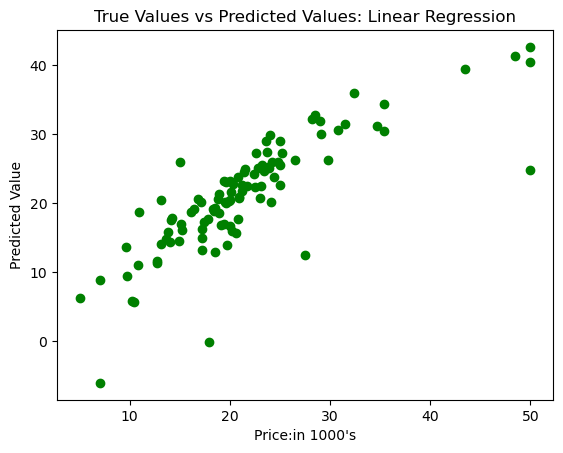

In [12]:
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price:in 1000's")
plt.ylabel("Predicted Value")
plt.title("True Values vs Predicted Values: Linear Regression")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 24.291119474973538
Mean Absolute Error: 3.1890919658878416


# Deep Learning

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 204.0997 - mae: 10.6970 - val_loss: 86.0236 - val_mae: 7.5577
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 80.9839 - mae: 6.8087 - val_loss: 102.0505 - val_mae: 7.5191
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 64.1572 - mae: 6.0295 - val_loss: 75.7469 - val_mae: 7.1345
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 61.8944 - mae: 5.8956 - val_loss: 90.0984 - val_mae: 6.7805
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 54.9109 - mae: 5.3350 - val_loss: 75.1590 - val_mae: 5.7646
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 53.5910 - mae: 5.3056 - val_loss: 79.5091 - val_mae: 6.3750
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 48.6978 - mae: 5.0300 - val_loss: 70.7604 - val_mae: 5.6987
Epoch 8/100
12/12 [==============================] - 0s 3ms/step 

12/12 [==============================] - 0s 3ms/step - loss: 25.2627 - mae: 3.7624 - val_loss: 61.1305 - val_mae: 4.9616
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 25.9720 - mae: 3.7763 - val_loss: 62.7860 - val_mae: 5.3115
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 29.1212 - mae: 4.0928 - val_loss: 78.5291 - val_mae: 5.7319
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 28.8751 - mae: 4.1249 - val_loss: 72.1509 - val_mae: 5.4226
Epoch 66/100
12/12 [==============================] - 0s 3ms/step - loss: 26.4802 - mae: 3.8738 - val_loss: 64.7061 - val_mae: 6.0833
Epoch 67/100
12/12 [==============================] - 0s 3ms/step - loss: 25.9431 - mae: 3.8399 - val_loss: 68.1419 - val_mae: 5.2409
Epoch 68/100
12/12 [==============================] - 0s 3ms/step - loss: 25.9162 - mae: 3.8451 - val_loss: 65.7614 - val_mae: 5.0549
Epoch 69/100
12/12 [==============================] - 0s 3ms/step - loss: 2

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price:in 1000's")
plt.ylabel("Predicted Value")
plt.title("True Values vs Predicted Values: Linear Regression")
plt.show()

In [16]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 2ms/step - loss: 27.3395 - mae: 4.1699
Mean squared error on test data:  27.339542388916016
Mean absolute error on test data:  4.169895172119141
